Here we will use a neural network to recognize the hand-written digits zero and one.


First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
from public_tests import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
X,y = load_data()

# Basic understanding of mathplot 

Our input is normalized we have data set in data folder they are stored in .npy format, and values ranges between -ve to +ve. We can have values between 0-255 but mathplot can convert it for you if you have value in normalize format.

The new default colormap used by matplotlib. ScalarMappable instances is 'viridis' search about viridis
Here colors are plotted using mathplot we set default colormap, when we change cmap=grey only grey-scale is show,

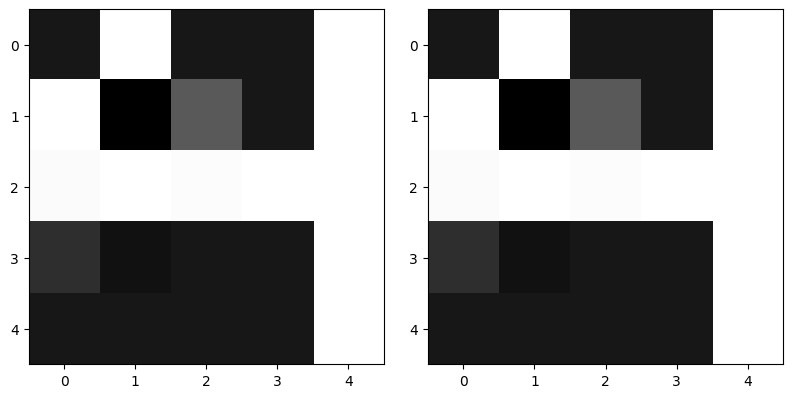

In [3]:
a = np.array([0.00000000e+00,  2.78729541e-01,  0.0,  0, 2.78729541e-01, 
 2.78729541e-01, -2.84542484e-02,  8.03826593e-02,  0, 2.78729541e-01,
  2.73853746e-01,  2.78729541e-01,  2.74293607e-01,  2.78729541e-01, 2.78729541e-01,
  2.77562977e-02, -7.06315478e-03,  2.34715414e-04,  0, 2.78729541e-01,
  0,0,0,0, 2.78729541e-01
])

fig, axes = plt.subplots(1,2, figsize=(8,8))
fig.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
    
    # Display the image
    ax.imshow(a.reshape(5,5),cmap='gray')


Here we represent transpose of data input bcoz our dataset have different transpose form.

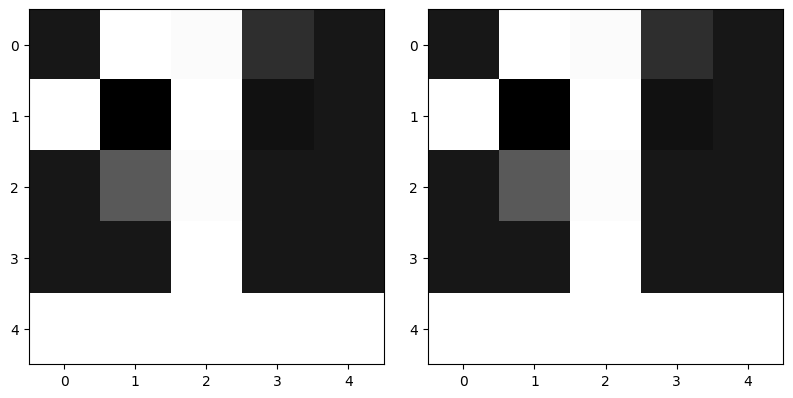

In [4]:

fig, axes = plt.subplots(1,2, figsize=(8,8))
fig.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
    
    # Display the image
    ax.imshow(a.reshape(5,5).T,cmap='gray')

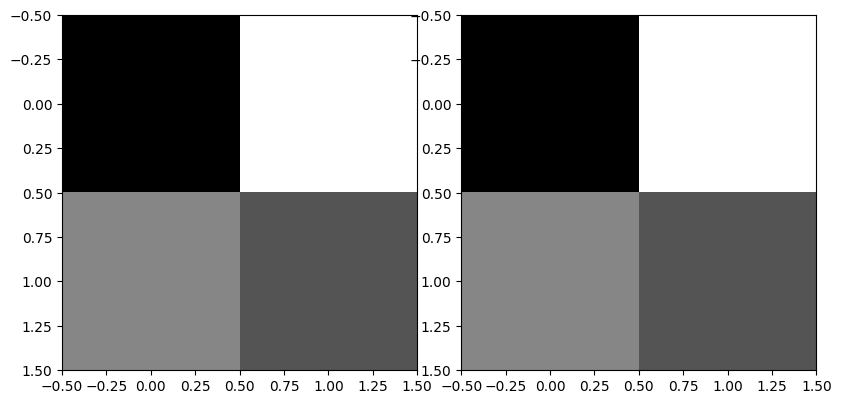

In [5]:
a = np.array([0,190,100,63])

fig, axes = plt.subplots(1,2, figsize=(8,8))
fig.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
    
    # Display the image
    ax.imshow(a.reshape(2,2),cmap='gray')


# Now starting nn implementation

<a name="2.3"></a>
### 2.3 Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has three dense layers with sigmoid activations.
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="images/C2_W1_Assign1.PNG" width="500" height="400">

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $1$ output unit in layer 3. 

    - Recall that the dimensions of these parameters are determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 1) and the shape of `b3` is: (1,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (1,n) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention. 
               

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $1$ output unit in layer 3. 

    - Recall that the dimensions of these parameters are determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 1) and the shape of `b3` is: (1,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (1,n) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention. 
               


Below, using Keras [Sequential model](https://keras.io/guides/sequential_model/) and [Dense Layer](https://keras.io/api/layers/core_layers/dense/) with a sigmoid activation to construct the network described above.

In [6]:
model = Sequential(
    [
        #specify input size 
        tf.keras.Input(shape=(400,)),

        tf.keras.layers.Dense(25, activation='sigmoid'),
        tf.keras.layers.Dense(15, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='sigmoid')

        #Last layer is single neuron means for binary classification whether image is 0 or 1.
    ], name = 'my_model'

)

In [7]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [8]:
[layer1, layer2, layer3] = model.layers

W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [9]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


`xx.get_weights` returns a NumPy array. One can also access the weights directly in their tensor form. Note the shape of the tensors in the final layer.

In [10]:
print(model.layers[2].weights)

[<tf.Variable 'dense_2/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.30157435],
       [ 0.11721557],
       [ 0.00834441],
       [-0.07801098],
       [-0.5843943 ],
       [ 0.19785702],
       [ 0.29410452],
       [ 0.26294613],
       [-0.34561086],
       [ 0.42066044],
       [-0.17645255],
       [ 0.2206425 ],
       [ 0.09701937],
       [ 0.32792693],
       [ 0.4494043 ]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


The following code will define a loss function and run gradient descent to fit the weights of the model to the training data. This will be explained in more detail in the following week.

In [11]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 3s 4ms/step - loss: 0.6671
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.5446
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4123
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.3006
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.2244
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1737
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1392
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1147
Epoch 9/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0966
Epoch 10/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0828
Epoch 11/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0720
Epoch 12/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0633
Epoch 13/20
32/32 [==============================

To run the model on an example to make a prediction, use [Keras `predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model). The input to `predict` is an array so the single example is reshaped to be two dimensional.
Since our matrix X which is has 1000 number of training sample and each sample has 400 features so X is of size (1000,400) and single example is of form (1,400)

In [12]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 215ms/step
 predicting a zero: [[0.03655514]]
1/1 [==============================] - 0s 45ms/step
 predicting a one:  [[0.9871153]]


The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero. 
In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one.
As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

In [13]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


Let's compare the predictions vs the labels for a random sample of 64 digits.

1/1 [==============================] - 0s 29ms/step


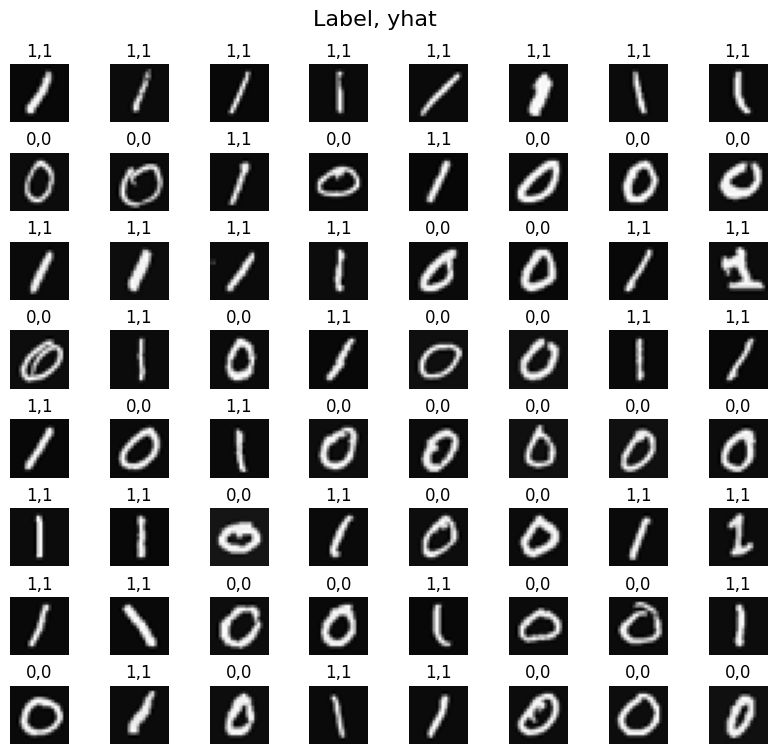

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400)) #See in keras predict above! Why predict have this reshape
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

Till this is 1st blog of NN handwriten below are upcoming blogs.

# This is second part of blog

<a name="2.5"></a>
### 2.5 NumPy Model Implementation (Forward Prop in NumPy)
As described in lecture, it is possible to build your own dense layer using NumPy. This can then be utilized to build a multi-layer neural network. 

<img src="images/C2_W1_dense2.PNG" width="600" height="450">



Below, build a dense layer subroutine. The example in lecture utilized a for loop to visit each unit (`j`) in the layer and perform the dot product of the weights for that unit (`W[:,j]`) and sum the bias for the unit (`b[j]`) to form `z`. An activation function `g(z)` is then applied to that result. This section will not utilize some of the matrix operations described in the optional lectures. These will be explored in a later section.

In [15]:
# UNQ_C2
# GRADED FUNCTION: my_dense

def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    for i in range(units):
        w = W[:,i]   #same as w = W[0:399,i] all 400 weights along ith column
        z = np.dot(a_in,w) + b[i]
        a_out[i] = sigmoid(z) 
    return(a_out)


In [16]:
# Quick Check
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(x_tst)
print(W_tst)
print(A_tst)

[0.1 0.2]
[[0.1 0.2 0.3]
 [0.4 0.5 0.6]]
[0.54735762 0.57932425 0.61063923]


The following cell builds a three-layer neural network utilizing the `my_dense` subroutine above.

In [17]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x,W1,b1,sigmoid)
    a2 = my_dense(a1,W2,b2,sigmoid)
    a3 = my_dense(a2,W3,b3,sigmoid)
    return a3

We will use same trained weights and biases from Tensorflow.

In [18]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()
#We have 1000 such example which we can change by giving number
print(X[0].shape,W1_tmp.shape[0])  #This should same since every features should have corresponding weights
print("This is single input with 400 feautres",X[0])
print("This is w1 which has 400 weights along 1st column ",W1_tmp[:,1])



(400,) 400
This is single input with 400 feautres [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.0000

In [19]:
# make predictions

prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])
prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

yhat =  0  label=  0
yhat =  1  label=  1


Run the following cell to see predictions from both the Numpy model and the Tensorflow model. This takes a moment to run.

1/1 [==============================] - 0s 29ms/step


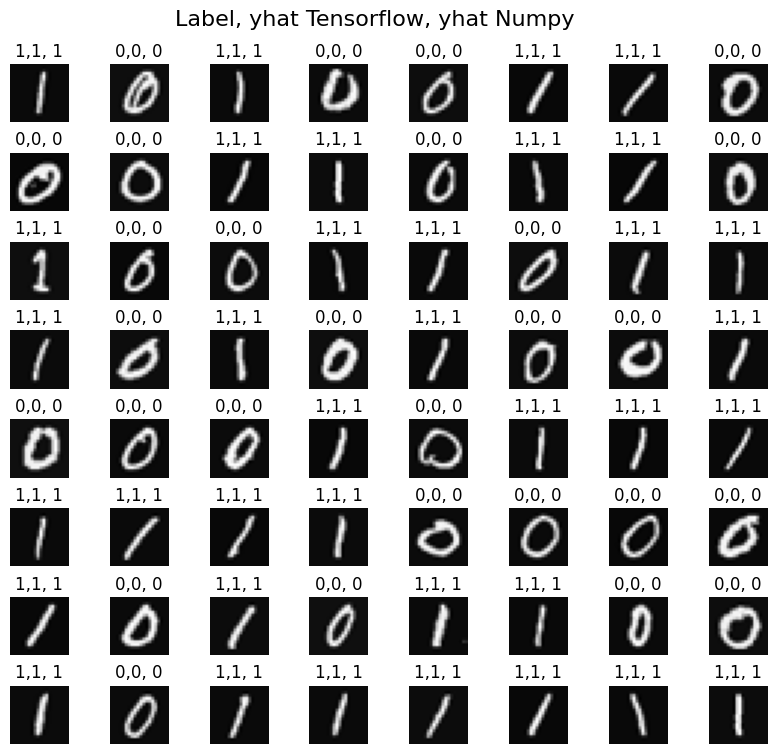

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the custom function
    prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp ) 
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Prediction using tensorflow
    prediction = model.predict(X[random_index].reshape(1,400)) 
    if prediction >= 0.5:
        tf_yhat = 1
    else:
        tf_yhat = 0
    

    # Display the label above the image
    ax.set_title(f"{y[random_index][0]},{tf_yhat}, {yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()


#### We are implementing neuron from scratch. At beginning create NN for 1 input which is x[0] who have 400 features means we have 400 weights for 1 neuron and 1 bias. Total in 1st layer we have 25 neurons so (400,) is input (400,25) is weights shape.
# f = w.x +b <br>
**where w = W[:,1]** [:,1] take all elements across row i.e 0:400 of 1st column
`Consider all 400 weights of 1st column thus we have 400 feautres and 400 weights w, 1 bias b for 1 neuron we have such 25 so repeat this 25 times`



# Third part vector representation

###  Vectorized NumPy Model Implementation 

**vectorized numpy model we don't need to keep track of jth column since matrix multiplication handles that** <br>
The  vector and matrix operations that can be used to speed the calculations.
Below describes a layer operation that computes the output for all units in a layer on a given input example:

<img src="images/C2_W1_VectorMatrix.PNG" width="600" height="450">

We can demonstrate this using the examples `X` and the `W1`,`b1` parameters above. We use `np.matmul` to perform the matrix multiply. Note, the dimensions of x and W must be compatible as shown in the diagram above.

In [21]:
x = X[0].reshape(-1,1)         # column vector (400,1)
z1 = np.matmul(x.T,W1) + b1    # (1,400)(400,25) = (1,25)
a1 = sigmoid(z1)
print(a1.shape)

(1, 25)


You can take this a step further and compute all the units for all examples in one Matrix-Matrix operation.

<img src="images/C2_W1_MatrixMatrix.PNG" width="600" height="450">

The full operation is $\mathbf{Z}=\mathbf{XW}+\mathbf{b}$. This will utilize NumPy broadcasting to expand $\mathbf{b}$ to $m$ rows. If this is unfamiliar, a short tutorial is provided at the end of the notebook.



Below, compose a new `my_dense_v` subroutine that performs the layer calculations for a matrix of examples. This will utilize `np.matmul()`.



In [22]:
# UNQ_C3
# UNGRADED FUNCTION: my_dense_v

def my_dense_v(A_in, W, b, g):
    """
    Computes dense layer
    Args:
      A_in (ndarray (m,n)) : Data, m examples, n features each m = 1000, n = 400 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units since our m = 1000 training data every variable get's broadcasted(repeated) to match the shape
      b    (ndarray (1,j)) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      A_out (tf.Tensor or ndarray (m,j)) : m examples, j units
    """
    A_out = g(np.matmul(A_in,W) + b)
    #Earlier we used for loop for 25 iteration i.e. along column which is handle by matrix mulitplication property i.e. it requires same adjacent matrix form (1,2)X(2,3)
    return(A_out)

In [23]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1, 3 features)
A_tst = my_dense_v(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]]


In [30]:
# UNIT TESTS
test_c3(my_dense_v)

All tests passed!


The following cell builds a three-layer neural network utilizing the `my_dense_v` subroutine above.

In [31]:
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_v(X,  W1, b1, sigmoid)
    A2 = my_dense_v(A1, W2, b2, sigmoid)
    A3 = my_dense_v(A2, W3, b3, sigmoid)
    return(A3)

We can again copy trained weights and biases from Tensorflow.

In [32]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

Let's make a prediction with the new model. This will make a prediction on *all of the examples at once*. Note the shape of the output.
<br>
Here we are not passing 1 input but infact all 1000 input in first layer so X is (1000,400) W is (400,25) 
matmuliplication of both X  (1000,400) *x* W (400,25) = (1000,25)
<br>
**is the shape of layer 1 output**

In [37]:
Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp ) 
print(X.shape)
#Bcoz of X size 1000  training data every variable get's broadcasted(repeated) to match the shape to size 1000 that happens inside matrix operations
Prediction.shape #This gives shape of output (1000 training examples,1 is predicted output)

(1000, 400)
(400, 25)


TensorShape([1000, 1])

We'll apply a threshold of 0.5 as before, but to all predictions at once.

In [ ]:
Yhat = (Prediction >= 0.5).numpy().astype(int) #Here we are creating Yhat matrix by using Prediction matrix
#Yhat = (Prediction >= 0.5) #This creates matrix Yhat having boolean value for expression
# print(Yhat)
print("predict a zero: ",Yhat[0], "predict a one: ", Yhat[500])
Yhat.shape

Run the following cell to see predictions. This will use the predictions we just calculated above. This takes a moment to run.

In [ ]:
# Here we are not running neural network here bcoz we already have output in our Yhat so we compare and print them.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
   
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off() 
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()

You can see how one of the misclassified images looks.

In [ ]:
fig = plt.figure(figsize=(1, 1))
errors = np.where(y != Yhat)
X_random_reshaped = X[errors[0][0]].reshape((20, 20)).T
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"{y[errors[0][0],0]}, {Yhat[random_index, 0]}")
plt.axis('off')
plt.show()

<a name="2.8"></a>
### NumPy Broadcasting Tutorial

*Broadcasting simplies repeats the element means W shape is (1,400) bcoz of X shape(1000,400) W get's repeated 1000 times.*


In the last example,  $\mathbf{Z}=\mathbf{XW} + \mathbf{b}$ utilized NumPy broadcasting to expand the vector $\mathbf{b}$. If you are not familiar with NumPy Broadcasting, this short tutorial is provided.

$\mathbf{XW}$  is a matrix-matrix operation with dimensions $(m,j_1)(j_1,j_2)$ which results in a matrix with dimension  $(m,j_2)$. To that, we add a vector $\mathbf{b}$ with dimension $(1,j_2)$.  $\mathbf{b}$ must be expanded to be a $(m,j_2)$ matrix for this element-wise operation to make sense. This expansion is accomplished for you by NumPy broadcasting.

Broadcasting applies to element-wise operations.  
Its basic operation is to 'stretch' a smaller dimension by replicating elements to match a larger dimension.

More [specifically](https://NumPy.org/doc/stable/user/basics.broadcasting.html): 
When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when
- they are equal, or
- one of them is 1   

If these conditions are not met, a ValueError: operands could not be broadcast together exception is thrown, indicating that the arrays have incompatible shapes. The size of the resulting array is the size that is not 1 along each axis of the inputs.

Here are some examples:

<figure>
    <center> <img src="./images/C2_W1_Assign1_BroadcastIndexes.PNG"  alt='missing' width="400"  ><center/>
    <figcaption>Calculating Broadcast Result shape</figcaption>
<figure/>

The graphic below describes expanding dimensions. Note the red text below:

<figure>
    <center> <img src="./images/C2_W1_Assign1_Broadcasting.gif"  alt='missing' width="600"  ><center/>
    <figcaption>Broadcast notionally expands arguments to match for element wise operations</figcaption>
<figure/>

The graphic above shows NumPy expanding the arguments to match before the final operation. Note that this is a notional description. The actual mechanics of NumPy operation choose the most efficient implementation.

For each of the following examples, try to guess the size of the result before running the example.

In [ ]:
a = np.array([1,2,3]).reshape(-1,1)  #(3,1)
b = 5
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

(a + b).shape: (3, 1), 
a + b = 
[[6]
 [7]
 [8]]


Note that this applies to all element-wise operations:

In [ ]:
a = np.array([1,2,3]).reshape(-1,1)  #(3,1)
b = 5
print(f"(a * b).shape: {(a * b).shape}, \na * b = \n{a * b}")

(a * b).shape: (3, 1), 
a * b = 
[[ 5]
 [10]
 [15]]


<figure>
    <img src="./images/C2_W1_Assign1_VectorAdd.PNG"  alt='missing' width="740" >
    <center><figcaption><b>Row-Column Element-Wise Operations</b></figcaption></center>
<figure/>

In [ ]:
a = np.array([1,2,3,4]).reshape(-1,1)
b = np.array([1,2,3]).reshape(1,-1)
print(a)
print(b)
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

[[1]
 [2]
 [3]
 [4]]
[[1 2 3]]
(a + b).shape: (4, 3), 
a + b = 
[[2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]]


This is the scenario in the dense layer you built above. Adding a 1-D vector $b$ to a (m,j) matrix.
<figure>
    <img src="./images/C2_W1_Assign1_BroadcastMatrix.PNG"  alt='missing' width="740" >
    <center><figcaption><b>Matrix + 1-D Vector</b></figcaption></center>
<figure/>